#Marlena Giannone Final Project: Predicting Poetry Authors


#Introduction

This [dataset](https://www.kaggle.com/johnhallman/complete-poetryfoundationorg-dataset) contains over 15,000 poems with over 3,000 unique authors. With my minor in creative writing and my focus in that minor on poetry I thought it would be really interesting to try and predict who wrote what.  I first had to condense the set down into only the authors who have at least 10 poems each. It would be too hard to train a classifier otherwise. 

# Loading data

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('kaggle_poem_dataset.csv', index_col=0)

In [3]:
df

,Author,Title,Poetry Foundation ID,Content
0,Wendy Videlock,!,55489,"Dear Writers, I’m compiling the first in what ..."
1,Hailey Leithauser,0,41729,"Philosophic\nin its complex, ovoid emptiness,\..."
2,Jody Gladding,1-800-FEAR,57135,We'd like to talk with you about fear t...
3,Joseph Brodsky,1 January 1965,56736,The Wise Men will unlearn your name.\nAbove yo...
4,Ted Berrigan,3 Pages,51624,For Jack Collom\n10 Things I do Every Day\n\np...
...,...,...,...,...
15647,Hannah Gamble,Your Invitation to a Modest Breakfast,56059,"It’s too cold to smoke outside, but if you com..."
15648,Eleni Sikelianos,Your Kingdom\n \n \n \n Launch Audio in a N...,145220,if you like let the body feel\nall its own evo...
15649,Susan Elizabeth Howe,“Your Luck Is About To Change”,41696,(A fortune cookie)\nOminous inscrutable Chines...
15650,Andrew Shields,Your Mileage May Vary,90177,1\nOur last night in the house was not our las...


I'm using a for loop to find the authors with more than 10 poems.

I am isolating the Author column, aggfunc = size means it's counting the size of each author (so how many times it's repeated). I found information on how to do this [here](https://datatofish.com/count-duplicates-pandas/).

In [3]:
dup_author = df.pivot_table(index=['Author'], aggfunc='size')
new_set = pd.DataFrame()
i = 0
for key in dup_author.keys():
    if dup_author[key] > 9:
        new_set = new_set.append(df.loc[df['Author'] == key], ignore_index = True)
        i+=1
        '''below I talk about wanting to see the most frequented words for each 
        poet for all their poems combined. These are the authors I will use to display that'''
        if dup_author[key] > 70:
            print(key)


Alfred, Lord Tennyson
Anonymous
William Shakespeare


Printing dup_author to show how it has collected the frequencies of each author.

In [5]:
dup_author

Author
'Annah Sobelman          2
A. B. Spellman           1
A. E. Housman           16
A. E. Stallings         29
A. F. Moritz            19
                        ..
mIEKAL aND               1
sam sax                  9
torrin a. greathouse     1
Álvaro de Campos         2
Æmilia Lanyer            1
Length: 3310, dtype: int64

In [6]:
new_set

,Author,Title,Poetry Foundation ID,Content
0,A. E. Housman,Epitaph on an Army of Mercenaries,57275,"These, in the days when heaven was falling,\nT..."
1,A. E. Housman,Is My Team Ploughing,51782,"“Is my team ploughing,\nThat I was used to dri..."
2,A. E. Housman,A Shropshire Lad 1: From Clee to heaven the b...,44410,"From Clee to heaven the beacon burns,\nThe shi..."
3,A. E. Housman,A Shropshire Lad 12: When I watch the living meet,44416,"When I watch the living meet,\nAnd the moving ..."
4,A. E. Housman,A Shropshire Lad 19: The time you won your tow...,44415,The time you won your town the race\nWe chaire...
...,...,...,...,...
7756,Yvor Winters,Sir Gawaine and the Green Knight\n \n \n \n ...,47722,"Reptilian green the wrinkled throat,\nGreen as..."
7757,Yvor Winters,The Slow Pacific Swell,47777,"Far out of sight forever stands the sea,\nBoun..."
7758,Yvor Winters,Time and the Garden\n \n \n \n Launch Audio...,47784,The spring has darkened with activity.\nThe fu...
7759,Yvor Winters,To a Young Writer,47780,"Achilles Holt, Stanford, 1930\nHere for a few ..."


As you can see the data is put in alphabetical order so here I'm shuffling the data to make it useable. I got this info from the [pandas doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [4]:
new_set = new_set.sample(frac =1)
new_set = new_set.reset_index()
new_set

,index,Author,Title,Poetry Foundation ID,Content
0,1718,David Rivard,Bewitched Playground,42652,Each could picture probably\nwith great care h...
1,638,Annie Finch,Coy Mistress,46082,"Sir, I am not a bird of prey:\na Lady does not..."
2,3079,Hayden Carruth,Notes on Poverty\n \n \n \n Launch Audio in...,51738,Was I so poor\nin those damned days\nthat I we...
3,4207,Kazim Ali,Know No Name\n \n \n \n Launch Audio in a N...,147021,Know no name\nWhy this holy day honed\nHollow ...
4,2643,Franz Wright,Alcohol,47554,You do look a little ill.\n\nBut we can do som...
...,...,...,...,...,...
7756,3174,Henry Wadsworth Longfellow,Keats,44635,The young Endymion sleeps Endymion's sleep;\nT...
7757,7111,W. S. Di Piero,The Ash Bringer\n \n \n \n Launch Audio in ...,52962,"A grainy predawn dark, early Expressway traffi..."
7758,4814,Marilyn Chin,"Millennium, Six Songs",54776,I.\n\nBlack swollen fruit dangling on a limb\n...
7759,6469,Sharon Olds,How It Felt,146221,"Even if I still had the clothes I wore,\nthose..."


In [8]:
new_set.loc[0]

index                                                                3285
Author                                                      Ilya Kaminsky
Title                   from\n  \n  \n   \n    Deaf Republic\n   \n   ...
Poetry Foundation ID                                                52523
Content                 I watch loud animal bones in their faces\n&amp...
Name: 0, dtype: object

Here's a plot of how many poems per author. It's a bit hard to look at since there are so many.


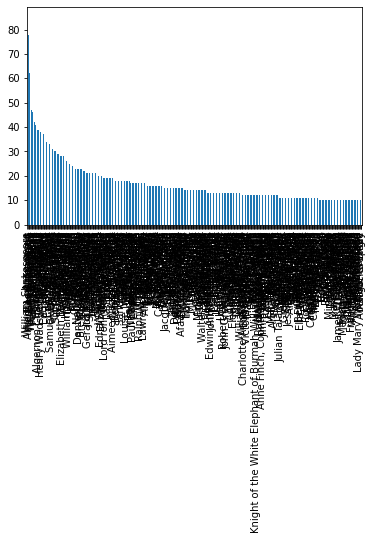

In [9]:
new_set['Author'].value_counts().plot.bar()

So the authors vary from having a max of nearly 80 poems and an average of 10.

A lot of the code and ideas I took from this [article](https://towardsdatascience.com/a-machine-learning-approach-to-author-identification-of-horror-novels-from-text-snippets-3f1ef5dba634) on prediciting which horror author's writing sytle was more unique, which is, in a sense, what I'm doing here. I imagine if I kept all the code the same (which I will do for one experiment) the method might only be accurate in predicting that one author with almost 80 poems- not even because it is unique, but because there is much more data to look at. 

# Changing into X and y for training and testing

After condensing the data I'm left with 7761 poems with 451 different authors. I'm not sure if this is going to be enough data but we shall find out.

Setting the labels and features.

In [5]:
y = new_set['Author']
print(y)

0                     David Rivard
1                      Annie Finch
2                   Hayden Carruth
3                        Kazim Ali
4                     Franz Wright
                   ...            
7756    Henry Wadsworth Longfellow
7757                W. S. Di Piero
7758                  Marilyn Chin
7759                   Sharon Olds
7760                  Alice Notley
Name: Author, Length: 7761, dtype: object


In [6]:
X = new_set['Content']

In [63]:
X

0       I watch loud animal bones in their faces\namp\...
1       It’s you I’d like to see Greece again with\nYo...
2       We are learning to control our thoughts\nto se...
3       I joy dear mother when I view\nThy perfect lin...
4       The stiff spokes of this wheel\ntouch the sore...
                              ...                        
7756    You had a woodchuck and an opium ball\nThe one...
7757    Let me cook you some dinner\nSit down and take...
7758    Sometimes she is a child within mine arms\nCow...
7759    Somewhat back from the village street\nStands ...
7760    Highlight Actions\nEnable or disable annotatio...
Name: Content, Length: 7761, dtype: object

# Word Clouds (A display of the most frequented words per poem)

The same [article](https://towardsdatascience.com/a-machine-learning-approach-to-author-identification-of-horror-novels-from-text-snippets-3f1ef5dba634) shows how to display the frequency of words in a poem in a word cloud. I thought this was a very cool and helpful visual. If my dataset had fewer authors and more of each of their poems I'd try and create a cloud for each and see how their most useds words differ. [Here](https://www.datacamp.com/community/tutorials/wordcloud-python) is another article I used to learn more about word clouds.

In [13]:
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [14]:
#?WordCloud

I watch loud animal bones in their faces
&amp;
I can smell the earth.
Our boys want a public killing in a sunlit piazza
They drag a young policeman, a sign in his arms swaying
Ilya Kaminsky


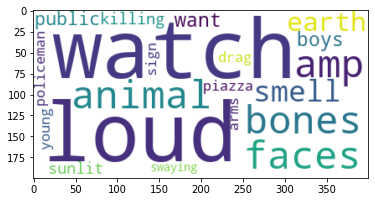

It’s you I’d like to see Greece again with
You I’d like to take to bed of cyclamen
You know I nurse a certain myth
about myself              that I descend
de tribus d’origine asiatique
and am part Thracian or Macedonian
cleaving to a Hellenic mystique
after centuries’ migration inland

a full moon
rising over the Acropolis
I can repeat the scene        this time à deux
as then I had no one to kiss
slicing halloumi amid the hullabaloo
of a rooftop taverna in   July
The doors that opened to lovers
pulled like tree roots from darkness        I
close upon us now like book covers

The alcove in which we embrace
is cool with brilliant tile
and weirded by a dove’s note       chase
of ouzo with Uzi          junta-style
History makes its noise      we duck
till it passes      Love we think is our due
Not we think like the epoch
the unchosen thing we’re wedded to
Ange Mlinko


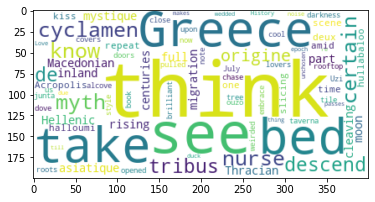

We are learning to control our thoughts,
to set obtrusive thoughts aside.

It takes an American
to do really big things.

Often I have no thoughts to push against.

It's lonely in a song
about outer space.

When I don't have any thoughts,
I want one!

A close-up reveals
that she has chosen

a plastic soap dish
in the shape of a giant sea turtle.

Can a thought truly be mine
if I am not currently thinking it?

There are two sides
to any argument;

one arm
in each sleeve.

•


Maybe I am always meditating,
if by that you mean

searching for a perfect
stranger.
Rae Armantrout


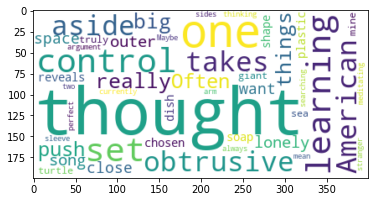

In [15]:
for i in range(3):
    wordcloud_i = WordCloud(background_color='white').generate(X[i])
    print(X[i])
    print(new_set['Author'][i])
    plt.imshow(wordcloud_i, interpolation='bilinear')
    plt.show()

The top poets with the most poems are:

Alfred, Lord Tennyson;
Emily Dickinson;
William Shakespeare
(I removed Anonymous because I figure that is not one collective person but rather a series of poets who didn't want to be named, hence finding a pattern in them would be extremely difficult).

Here are the word clouds for all of the words in all of their poems

In [16]:
contents = ""
for i in range(len(y)):
    if y[i] == "Alfred, Lord Tennyson":
        contents += X[i]

Checking to see this did what I wanted it to (concatenated all the words from each poem).

In [17]:
contents

'In Love, if Love be Love, if Love be ours,\nFaith and unfaith can ne’er be equal powers:\nUnfaith in aught is want of faith in all.\n\nIt is the little rift within the lute,\nThat by and by will make the music mute,\nAnd ever widening slowly silence all.\n\nThe little rift within the lover’s lute,\nOr little pitted speck in garner’d fruit,\nThat rotting inward slowly moulders all.\n\nIt is not worth the keeping: let it go:\nBut shall it? answer, darling, answer, no.\nAnd trust me not at all or all in all.Dark house, by which once more I stand\nHere in the long unlovely street,\nDoors, where my heart was used to beat\nSo quickly, waiting for a hand,\n\nA hand that can be clasp\'d no more—\nBehold me, for I cannot sleep,\nAnd like a guilty thing I creep\nAt earliest morning to the door.\n\nHe is not here; but far away\nThe noise of life begins again,\nAnd ghastly thro\' the drizzling rain\nOn the bald street breaks the blank day.Our enemies have fall\'n, have fall\'n: the seed,\nThe lit

Author: Alfred, Lord Tennyson


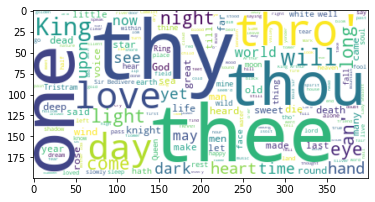

In [18]:
#wordcloud_i = WordCloud().generate(contents)
wordcloud_i = WordCloud(background_color='white').generate(contents)
print('Author: Alfred, Lord Tennyson')
plt.imshow(wordcloud_i, interpolation='bilinear')
plt.show()

Author: Emily Dickinson


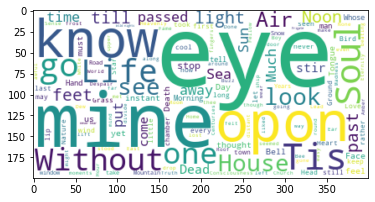

In [19]:
contents = ""
for i in range(len(y)):
    if y[i] == "Emily Dickinson":
        contents += X[i]
#wordcloud_i = WordCloud().generate(contents)
wordcloud_i = WordCloud(background_color='white').generate(contents)
print('Author: Emily Dickinson')
plt.imshow(wordcloud_i, interpolation='bilinear')
plt.show()

Author: William Shakespeare


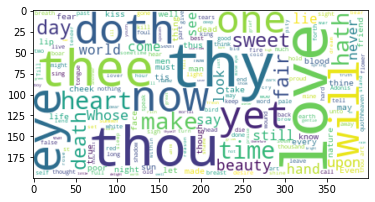

In [20]:
contents = ""
for i in range(len(y)):
    if y[i] == "William Shakespeare":
        contents += X[i]
wordcloud_i = WordCloud(background_color='white').generate(contents)
print('Author: William Shakespeare')
plt.imshow(wordcloud_i, interpolation='bilinear')
plt.show()

Based on these word clouds I will run a test of stopwords with the words that are "the" and equivalent because they are obviously taking up quite a bit of space for some authors.

# Training and Testing (Bag of Words and Naive Bayes)

Here I am changing the authors into numbered labels so I can work with them easier. I learned about the label encoder from the [scikit learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). 

In [21]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
y

array([190,  29, 344, ...,  93, 185,  31])

Here I will attempt to classify the data without removing any stopwords or punctuation. This will be interesting and I expect won't work well, but I want to keep the structure of the poems.

The Bag of Words classifier does exactly as it's described. It takes all the words and separates them and throws them in a "bag." The scikit learn CountVectorizer is used in this case which I learned more about [here](https://scikit-learn.org/stable/modules/feature_extraction.html#stop-words), but took and modified the code if necessary from [here](https://towardsdatascience.com/a-machine-learning-approach-to-author-identification-of-horror-novels-from-text-snippets-3f1ef5dba634).

However, what's hard with poetry vs say a movie script or a book is that every word counts, every word means something. Even punctuation means something. Another thing I realize thought is leaving stopwords in makes it harder to predict since most poets probably will have those stop words in their poems even if they are there for a reason. Accuracy would then be lower.



In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y
                                  ,test_size=0.2, random_state = 50)


bow_transformer=CountVectorizer().fit(X_train)
text_bow_train=bow_transformer.transform(X_train)
text_bow_test=bow_transformer.transform(X_test)


For this project I had to learn a new classification algorithm because my dataset was large with features not as simple as a number. We experimented with that a little in our final assignment but to be honest I was quite confused with how it worked. This classification technique is based on Bayes’ Theorem “with an assumption of independence among predictors (Ray).” “In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature” (Ray). Some of the pros of this method include needing less training data, performing better than logistic regression, and performs well on categorical variables.

It’s often used in Sentiment Analysis- so if I were to detect the tone of the poems and labeled them happy or sad or something like that.

Here is a quick explanation of Bayes' Theorem that I read to understand what was going on better:

Marginal probability is “the probability of an event irrespective of the outcomes of the other random variables”(Brownlee). Joint probability is the probability of two or more simultaneous events occurring. Conditional probability is the probability of one variable given the occurrence of another. Joint probability can be calculated with conditional probability P(A,B) = P(A|B)*P(B)- it is symmetrical and the conditional can be calculated with the inverse- it is not symmetrical. Conditional probability can also be calculated with the other conditional probability, P(A|B) + P(B|A) * P(A)/P(B). This is Bayes’ Theorem. 

In [23]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model = model.fit(text_bow_train, y_train)

In [24]:
model.score(text_bow_train, y_train)

0.04977448453608247

In [25]:
model.score(text_bow_test, y_test)

0.01674179008370895

Clearly the accuracy is basically nonexistent. 

Here I found some code to remove stop words ([link](https://towardsdatascience.com/a-machine-learning-approach-to-author-identification-of-horror-novels-from-text-snippets-3f1ef5dba634)) and [here](https://machinelearningmastery.com/clean-text-machine-learning-python/). This can be done in many ways and I will experiment with that further on.

In [34]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


I chose to just remove those words and see if the accuracy improved even a little.

In [13]:
stopword = ['the','thee','thou']

This method was taken from the article and modified slightly to fit my needs. It's a common way to preprocess text before using it and I found many similar examples on other sites as well.

Lemmatization takes words and reduces them to their roots/ base of the word while stemming just removes the ending. In this case lemmatization is better since we're already losing a lot of the poem by removing punctuation and eventually reducing it to a bag of words.

In [29]:
lemmatiser = WordNetLemmatizer()# Defining a module for Text Processing
def text_process(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not 
            in stopword]

I also attempted to create my own method to clean the poems, but using the lemmatizer got a little bit confusing so I ended up sticking with the example.

In [71]:
# # print(X[3].translate(str.maketrans('', '', string.punctuation)))
# # print('NORMAL')
# # print(X[3])
# no_punct = []
# for i in range(len(X)):
#     #X[i] = X[i].translate(str.maketrans('', '', string.punctuation))
#     no_punct.append(X[i].translate(str.maketrans('', '', string.punctuation)))
# print(pd.DataFrame(no_punct))
# ex = pd.DataFrame(no_punct)
# # print(X)

In [72]:
# ex[0].str.split()

In [73]:
#lemmatiser.lemmatize(ex.loc[0].str.split())

In [68]:
def process_txt(txt):
    #remove punctuation
    no_punct = []
    for i in range(len(txt)):
        no_punct.append((txt[i].translate(str.maketrans('', '', string.punctuation))))
    no_punct = pd.DataFrame(no_punct)
    for i in range(len(no_punct)):
        no_punct[i].str.split()
    #txt = pd.DataFrame(no_punct)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state = 50)
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_train)

text_bow_train=bow_transformer.transform(X_train)
text_bow_test=bow_transformer.transform(X_test)

In [31]:
model = MultinomialNB()
model = model.fit(text_bow_train, y_train)

In [32]:
model.score(text_bow_train, y_train)

0.048163659793814435

In [33]:
model.score(text_bow_test, y_test)

0.014810045074050225

This clearly did not work well at all either.

With removal of the english stopwords. This code is the same as the code from the article. I tried to create my own method similar to this one, but I couldn't get it to run properly within the count vectorizer.

In [74]:
def text_process2(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not 
            in stopwords.words('english')]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 50)
bow_transformer=CountVectorizer(analyzer=text_process2).fit(X_train)
text_bow_train=bow_transformer.transform(X_train)
text_bow_test=bow_transformer.transform(X_test)



model = MultinomialNB()
model = model.fit(text_bow_train, y_train)

In [77]:
model.score(text_bow_train, y_train)

0.24822809278350516

In [78]:
model.score(text_bow_test, y_test)

0.02962009014810045

None of these methods are working very well at all. However, I was shocked to see there was even 25% accuracy. That is a big jump from when I initially started testing and honestly isn't terrible considering bag of words strips the order and structure of the words in the poems. In the article they used a confusion matrix to display the accuracies of each individual author but that matrix would be much to large... Below I will use the top five most frequented authors and repeat the process seeing if the accuracies improve. I am removing "Anonymous" because I assume the poems from that author is not one person.

# Testing with the top 5 poets

In [22]:
df = pd.read_csv('kaggle_poem_dataset.csv', index_col=0)

In [23]:
dup_author = df.pivot_table(index=['Author'], aggfunc='size')
new_set = pd.DataFrame()
i = 0
labels = []
for key in dup_author.keys():

    if dup_author[key] > 50 and key != "Anonymous":
        new_set = new_set.append(df.loc[df['Author'] == key], ignore_index = True)
        i+=1
        '''below I talk about wanting to see the most frequented words for each 
        poet for all their poems combined. These are the authors I will use to display that'''
        if dup_author[key] > 50:
            print(key)
            labels.append(key)
print(labels)

Alfred, Lord Tennyson
Emily Dickinson
Rae Armantrout
William Shakespeare
William Wordsworth
['Alfred, Lord Tennyson', 'Emily Dickinson', 'Rae Armantrout', 'William Shakespeare', 'William Wordsworth']


In [24]:
new_set = new_set.sample(frac =1)
new_set = new_set.reset_index()

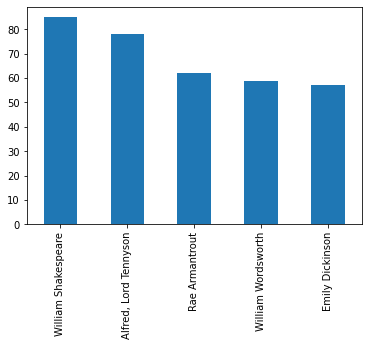

In [25]:
new_set['Author'].value_counts().plot.bar()

In [26]:
from sklearn.preprocessing import LabelEncoder
y = new_set['Author']
print(y)

0         William Wordsworth
1        William Shakespeare
2      Alfred, Lord Tennyson
3      Alfred, Lord Tennyson
4         William Wordsworth
               ...          
336    Alfred, Lord Tennyson
337          Emily Dickinson
338       William Wordsworth
339           Rae Armantrout
340    Alfred, Lord Tennyson
Name: Author, Length: 341, dtype: object


In [27]:
X = new_set['Content']
X

0      Most sweet it is with unuplifted eyes\nTo pace...
1      No longer mourn for me when I am dead\nThan yo...
2      He clasps the crag with crooked hands;\nClose ...
3      When on my bed the moonlight falls,\nI know th...
4      I\n“There is a Thorn—it looks so old,\nIn trut...
                             ...                        
336    O Swallow, Swallow, flying, flying South,\nFly...
337    Fame is a fickle food\nUpon a shifting plate\n...
338    ———A simple Child,\nThat lightly draws its bre...
339    So these are the hills of home. Hazy tiers\nne...
340    "Courage!" he said, and pointed toward the lan...
Name: Content, Length: 341, dtype: object

A Bird, came down the Walk -
He did not know I saw -
He bit an Angle Worm in halves
And ate the fellow, raw,

And then, he drank a Dew
From a convenient Grass -
And then hopped sidewise to the Wall
To let a Beetle pass -

He glanced with rapid eyes,
That hurried all abroad -
They looked like frightened Beads, I thought,
He stirred his Velvet Head. -

Like one in danger, Cautious,
I offered him a Crumb,
And he unrolled his feathers,
And rowed him softer Home -

Than Oars divide the Ocean,
Too silver for a seam,
Or Butterflies, off Banks of Noon,
Leap, plashless as they swim.
Emily Dickinson


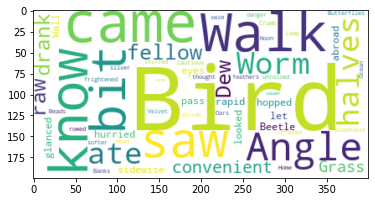

There was a Boy; ye knew him well, ye cliffs
And islands of Winander! many a time,
At evening, when the earliest stars began
To move along the edges of the hills,
Rising or setting, would he stand alone,
Beneath the trees, or by the glimmering lake;
And there, with fingers interwoven, both hands
Pressed closely palm to palm and to his mouth
Uplifted, he, as through an instrument,
Blew mimic hootings to the silent owls
That they might answer him.—And they would shout
Across the watery vale, and shout again,
Responsive to his call,—with quivering peals,
And long halloos, and screams, and echoes loud
Redoubled and redoubled; concourse wild
Of jocund din! And, when there came a pause
Of silence such as baffled his best skill:
Then, sometimes, in that silence, while he hung
Listening, a gentle shock of mild surprise
Has carried far into his heart the voice
Of mountain-torrents; or the visible scene
Would enter unawares into his mind
With all its solemn imagery, its rocks,
Its woods, and tha

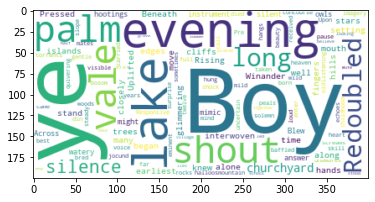

There was a roaring in the wind all night;
The rain came heavily and fell in floods;
But now the sun is rising calm and bright;
The birds are singing in the distant woods;
Over his own sweet voice the Stock-dove broods;
The Jay makes answer as the Magpie chatters;
And all the air is filled with pleasant noise of waters.

All things that love the sun are out of doors;
The sky rejoices in the morning's birth;
The grass is bright with rain-drops;—on the moors
The hare is running races in her mirth;
And with her feet she from the plashy earth
Raises a mist, that, glittering in the sun,
Runs with her all the way, wherever she doth run.

I was a Traveller then upon the moor;
I saw the hare that raced about with joy;
I heard the woods and distant waters roar;
Or heard them not, as happy as a boy:
The pleasant season did my heart employ:
My old remembrances went from me wholly;
And all the ways of men, so vain and melancholy.

But, as it sometimes chanceth, from the might
Of joys in minds that

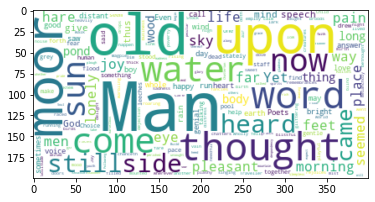

The Bustle in a House
The Morning after Death
Is solemnest of industries
Enacted opon Earth –

The Sweeping up the Heart
And putting Love away
We shall not want to use again
Until Eternity –
Emily Dickinson


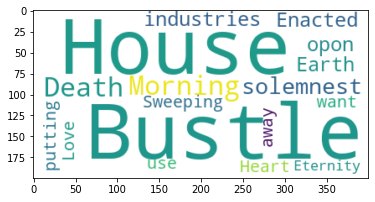

Banish Air from Air -
Divide Light if you dare -
They'll meet
While Cubes in a Drop
Or Pellets of Shape
Fit -
Films cannot annul
Odors return whole
Force Flame
And with a Blonde push
Over your impotence
Flits Steam.
Emily Dickinson


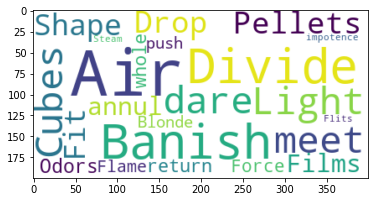

In [85]:
for i in range(5):
    #wordcloud_i = WordCloud().generate(X[i])
    wordcloud_i = WordCloud(background_color='white').generate(X[i])
    print(X[i])
    print(new_set['Author'][i])
    plt.imshow(wordcloud_i, interpolation='bilinear')
    plt.show()

The word clouds in these are already looking promising as they are pretty varied without removing stop words.

In [86]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
y

array([1, 4, 4, 1, 1, 3, 2, 0, 4, 0, 1, 3, 1, 4, 1, 3, 3, 3, 1, 2, 4, 3,
       3, 0, 1, 2, 3, 0, 2, 3, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2, 0, 2,
       3, 3, 0, 2, 2, 1, 4, 1, 1, 3, 2, 2, 1, 2, 4, 3, 2, 0, 1, 4, 2, 3,
       2, 0, 4, 0, 3, 1, 3, 0, 3, 3, 0, 1, 3, 1, 0, 3, 3, 2, 1, 1, 0, 3,
       2, 4, 1, 1, 3, 2, 3, 4, 4, 0, 0, 1, 2, 1, 4, 1, 0, 2, 0, 1, 3, 2,
       1, 4, 4, 4, 4, 0, 0, 0, 3, 0, 3, 1, 0, 3, 0, 3, 3, 2, 3, 0, 2, 0,
       1, 4, 4, 4, 1, 0, 2, 2, 4, 0, 4, 4, 2, 4, 1, 1, 2, 0, 2, 3, 0, 2,
       3, 2, 0, 0, 2, 0, 0, 1, 4, 3, 1, 4, 0, 0, 2, 4, 2, 0, 3, 3, 0, 0,
       2, 3, 1, 3, 4, 4, 0, 3, 4, 4, 3, 3, 0, 3, 0, 2, 0, 3, 3, 3, 3, 0,
       1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 4, 4, 2, 1, 3, 0, 3, 2, 0,
       4, 1, 4, 3, 2, 3, 4, 0, 1, 4, 4, 3, 3, 3, 1, 0, 2, 3, 4, 1, 4, 0,
       3, 3, 0, 0, 3, 2, 1, 3, 4, 3, 2, 3, 4, 2, 0, 0, 3, 3, 3, 3, 3, 4,
       4, 3, 3, 0, 1, 2, 4, 4, 0, 2, 1, 0, 4, 2, 3, 4, 0, 4, 2, 2, 0, 1,
       2, 1, 0, 3, 0, 3, 3, 2, 2, 0, 2, 1, 1, 3, 4,

This is removal of just the "the" words.

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y
                                  ,test_size=0.2 random_state = 50)
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_train)
text_bow_train=bow_transformer.transform(X_train)
text_bow_test=bow_transformer.transform(X_test)


model = MultinomialNB()
model = model.fit(text_bow_train, y_train)

In [88]:
model.score(text_bow_train, y_train)

0.9595588235294118

In [89]:
model.score(text_bow_test, y_test)

0.7391304347826086

I only removed the "the" words for this test and the accuracy changed that drastically. Although I'm not trying to prove that every word matters in poetry this helps prove that point considering I only took out a word that probably has the least meaning in a poem. 

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y
                                  ,test_size=0.2,random_state = 50)
bow_transformer=CountVectorizer(analyzer=text_process2).fit(X_train)
text_bow_train=bow_transformer.transform(X_train)
text_bow_test=bow_transformer.transform(X_test)


model = MultinomialNB()
model = model.fit(text_bow_train, y_train)

In [91]:
model.score(text_bow_train, y_train)

0.9963235294117647

In [92]:
model.score(text_bow_test, y_test)

0.8260869565217391

In [93]:
y_pred = model.predict(text_bow_test)

This is what I was looking for! This is 
the accuracy on the model that removes the English stopwords. It's only 10% more accurate than just remvoing "the" words which is quite interesting. Oh, maybe I can do a test of the most frequented words in the dataset between all the poets and remove them to see what happens.

What's interesting to me is that list of stopwords is very long and, as I already mentioned, probably rips away any of the meaning of the poems themeselves. However my goal wasn't sentiment analysis or anything of the like, so this method words well enough. I know there are many other ways this can be done and I didn't have time to experiment with them all. However, given what we've learned in class and how well I was able to understand what was going on I think this was an overall successful experiment. 

Here I will combine all the words and do a word cloud to find the most frequented.

In [97]:
X[0]

'A Bird, came down the Walk -\nHe did not know I saw -\nHe bit an Angle Worm in halves\nAnd ate the fellow, raw,\n\nAnd then, he drank a Dew\nFrom a convenient Grass -\nAnd then hopped sidewise to the Wall\nTo let a Beetle pass -\n\nHe glanced with rapid eyes,\nThat hurried all abroad -\nThey looked like frightened Beads, I thought,\nHe stirred his Velvet Head. -\n\nLike one in danger, Cautious,\nI offered him a Crumb,\nAnd he unrolled his feathers,\nAnd rowed him softer Home -\n\nThan Oars divide the Ocean,\nToo silver for a seam,\nOr Butterflies, off Banks of Noon,\nLeap, plashless as they swim.'

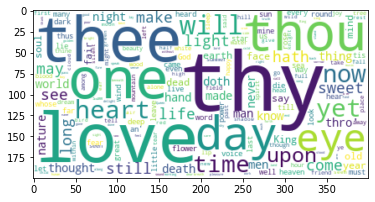

In [101]:
contents = ""
for i in range(len(X)):
    contents = contents +X[i]
#wordcloud_i = WordCloud().generate(contents)
wordcloud_i = WordCloud(background_color='white').generate(contents)
plt.imshow(wordcloud_i, interpolation='bilinear')
plt.show()
#contents

In [14]:
stopword2 = ['thee', 'thou', 'thy', 'will']

I just repasted the text_process method and changed to stopword list to this new one.

In [106]:
def text_process3(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not 
            in stopword2]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y
                                  ,test_size=0.2,random_state = 50)
bow_transformer=CountVectorizer(analyzer=text_process3).fit(X_train)
text_bow_train=bow_transformer.transform(X_train)
text_bow_test=bow_transformer.transform(X_test)


model = MultinomialNB()
model = model.fit(text_bow_train, y_train)

In [108]:
model.score(text_bow_train, y_train)

0.9595588235294118

In [109]:
model.score(text_bow_test, y_test)

0.7536231884057971

This did help with the accuracy from just the "the" words, but didn't surpass the English stopwords.

This is the confusion matrix for the highest accuracy test.

In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[20,  1,  2,  0,  0],
       [ 0,  8,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 1,  1,  1, 13,  2],
       [ 1,  1,  2,  0, 10]])

In [112]:
print(labels)

['Alfred, Lord Tennyson', 'Emily Dickinson', 'Rae Armantrout', 'William Shakespeare', 'William Wordsworth']


It looks like Alfred Lord Tennyson, and William Shakespeare had the highest accuracy based on the confusion matrix. Their words choice is probably a bit more unqiue than the other poets.

#A different Transformer

In the same documentation for CountVectorizer lied the tfidf transformer and vectorizer. I decided to also mess with these since the documentation explains the vectorizer uses tfidf transformer and count vectorizer in a single model.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state = 50)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stopword)
transformer = vectorizer.fit(X_train)

text_train=transformer.transform(X_train)
text_test=transformer.transform(X_test)

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model = model.fit(text_train, y_train)

In [29]:
model.score(text_train, y_train)

0.7867647058823529

In [30]:
model.score(text_test, y_test)

0.34782608695652173

This was with the "the" stopwords. it didn't work super well.

In [31]:
vectorizer = TfidfVectorizer(stop_words=stopword2)
transformer = vectorizer.fit(X_train)

text_train=transformer.transform(X_train)
text_test=transformer.transform(X_test)

model = MultinomialNB()
model = model.fit(text_train, y_train)

In [32]:
model.score(text_train, y_train)

0.7316176470588235

In [33]:
model.score(text_test, y_test)

0.34782608695652173

In [35]:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
transformer = vectorizer.fit(X_train)

text_train=transformer.transform(X_train)
text_test=transformer.transform(X_test)

model = MultinomialNB()
model = model.fit(text_train, y_train)

In [36]:
model.score(text_train, y_train)

0.9816176470588235

In [37]:
model.score(text_test, y_test)

0.42028985507246375

Better but still not as good as with the preprocessing code defined above.

In [46]:
vectorizer = TfidfVectorizer(use_idf=True)
transformer = vectorizer.fit_transform(X)

In [58]:
for i in range(5):
  first_vector = transformer[i]
  tfidf = pd.DataFrame(first_vector.T.todense(), index=vectorizer.get_feature_names(), columns=["tfidf"]) 
  print(tfidf.sort_values(by=["tfidf"],ascending=False))

               tfidf
the         0.250002
beauty      0.175436
humblest    0.161379
companions  0.161379
unuplifted  0.161379
...              ...
foretold    0.000000
forever     0.000000
forfeit     0.000000
forfeited   0.000000
ﬂy          0.000000

[10287 rows x 1 columns]
              tfidf
you        0.374505
am         0.267070
your       0.213135
world      0.196497
if         0.160542
...             ...
foretold   0.000000
forever    0.000000
forfeit    0.000000
forfeited  0.000000
ﬂy         0.000000

[10287 rows x 1 columns]
                tfidf
he           0.388809
clasps       0.256883
thunderbolt  0.239924
crawls       0.239924
watches      0.239924
...               ...
forest       0.000000
forests      0.000000
foretaste    0.000000
foretold     0.000000
ﬂy           0.000000

[10287 rows x 1 columns]
                  tfidf
thy            0.284745
moonlight      0.265771
the            0.257833
coast          0.245993
glory          0.195192
...                 ..

In [62]:
print(y[0],y[1],y[2],y[3],y[4])

William Wordsworth William Shakespeare Alfred, Lord Tennyson Alfred, Lord Tennyson William Wordsworth


I found the code on how to do this [here](https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.X83MMF57lQI). This shows the frequency of words in each poem. It words even quicker than the word clouds. I only printed the first 5 for conciseness, but I looked at all of them and it's interesting because most of the poems had stopwords in their top 5, but there were still quite a few poems that didn't. Looking just at the first 5 poems, stopwords aren't super prominent and after looking at the authors, it's the top three highest accuracy, which makes a lot of sense.

#Concluding Thoughts and Future Studies

I found this [thesis](https://ruor.uottawa.ca/bitstream/10393/37309/1/Kesarwani_Vaibhav_2018_thesis.pdf) titled "Automatic Poetry Classification Using Natural Language Processing" which discusses a variety of ways to classify poems using rhyme, diction, and metaphor. I focused on the frequency of the words themselves since there is so much information on classifiers like that. They use a support vector machine and a convolutional neural network. 

Some ideas used include syntactic parsing which is something I was trying to figure out how to do. It "involves the arrangements of sentences in a manner that all the dependenct relations and grammar associations between the words are shown." This includes using dependency trees and part of speech tagging which can then be used in stop word removal. They also use a formula that determines the importance of words instead of just using their frequency like in bag of words.

This piece also discusses what's already been done in this subject. There are actually quite a few more systems for poetry analysis than I would have thought so that's really exciting!

Overall, I learned a lot about text processing and the variety of ways it can be done. I hope to take this knowledge, use it, and expand upon for my honors thesis next semester.

#Bibliography

Brownlee, Jason. “A Gentle Introduction to Bayes Theorem for Machine Learning.” Machine Learning Mastery, 3 Oct. 2019, https://machinelearningmastery.com/bayes-theorem-for-machine-learning/.

Navoneel Chakrabarty. A Machine Learning Approach to Author Identification of Horror Novels from Text Snippets | by Navoneel Chakrabarty | Towards Data Science. https://towardsdatascience.com/a-machine-learning-approach-to-author-identification-of-horror-novels-from-text-snippets-3f1ef5dba634. Accessed 5 Dec. 2020.

Ray, Sunill. “Learn Naive Bayes Algorithm | Naive Bayes Classifier Examples.” Analytics Vidhya, 11 Sept. 2017, https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/.

Vaibhav Kesarwani. Automatic Poetry Classification Using Natural Language Processing. University of Ottawa, 2018, https://ruor.uottawa.ca/bitstream/10393/37309/1/Kesarwani_Vaibhav_2018_thesis.pdf.

